# Use this file to analysze the change in arrival time of migratory birds at a geospatial location

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import migrationFunctions as clf
import importlib

In [2]:
importlib.reload(clf)
migration_dataset = "../datasets/migration/NABBP_2023_grp_03.zip"
world_shape = "../datasets/geodata/110m_cultural.zip"
species_id = [1723]
tracking_month = 9
year_range = [1960, 2023]
year_step = 5
sighting_latitudes = [43, 44]

C:\Users\ashwi\AppData\Local\Temp\ipykernel_1756\632645862.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(migration_dataset)
c:\Users\ashwi\Desktop\Ashwin\UCSD\Quarters\FA24\ECE143\project\ECE143_cliMATE\migrationAnalysis\migrationFunctions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['EVENT_DATE'] = pd.to_datetime(species_data['EVENT_DATE'], format='mixed', errors='coerce')
c:\Users\ashwi\Desktop\Ashwin\UCSD\Quarters\FA24\ECE143\project\ECE143_cliMATE\migrationAnalysis\migrationFunctions.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

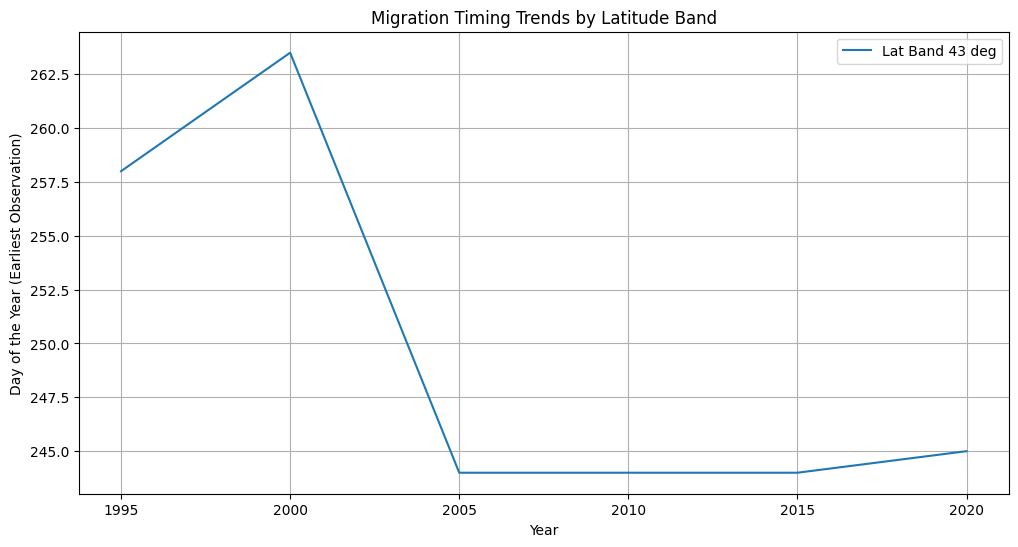

In [3]:
# Load data
df = pd.read_csv(migration_dataset)

migration_timing = clf.getFirstSighting(df, species_id, sighting_latitudes, year_range, year_step, tracking_month)

# Plot timing trends for a few latitude bands
plt.figure(figsize=(12, 6))
for lat_band in migration_timing['LAT_BAND'].unique():
    lat_data = migration_timing[migration_timing['LAT_BAND'] == lat_band]
    plt.plot(lat_data['EVENT_YEAR'], lat_data['MEDIAN_DAY_OF_YEAR'], label=f"Lat Band {lat_band} deg")

plt.title("Migration Timing Trends by Latitude Band")
plt.xlabel("Year")
plt.ylabel("Day of the Year (Earliest Observation)")
plt.legend()
plt.grid()
plt.show()